# COSC 437 Data Mining - Lab Assignment 1 - Exploratory Data Analysis in Python

In this lab assignment, you are going to use Python and packages to process fictional data on university students grades. 

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, load the data from the file student_grades.csv. It will be easier to load it as a pandas DataFrame.

In [57]:
# Load data from students_grades.csv
student_grades_data = pd.read_csv("students_grades.csv")

Now, take a look at the data and understand how the data look like:

In [58]:
# Show info and head of the data
student_grades_data.info()
student_grades_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student Number  571 non-null    int64  
 1   PH-121          571 non-null    float64
 2   HS-101          571 non-null    float64
 3   CY-105          570 non-null    float64
 4   HS-105/12       570 non-null    float64
 5   MT-111          569 non-null    float64
 6   CS-105          571 non-null    float64
 7   CS-106          569 non-null    float64
 8   EL-102          569 non-null    float64
 9   EE-119          569 non-null    float64
 10  ME-107          569 non-null    float64
 11  CS-107          569 non-null    float64
 12  HS-205/20       566 non-null    float64
 13  MT-222          566 non-null    float64
 14  EE-222          564 non-null    float64
 15  MT-224          564 non-null    float64
 16  CS-210          564 non-null    float64
 17  CS-211          566 non-null    flo

,Student Number,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,97001,45.88,12.92,22.46,33.85,15.64,7.80,5.57,22.30,54.38,...,26.82,24.67,23.88,23.82,24.10,82.02,86.99,22.61,64.47,75.35
1,97002,92.53,7.57,11.81,14.34,50.42,33.65,7.49,87.00,8.53,...,10.40,10.20,10.38,27.06,13.05,75.13,48.15,32.86,31.75,64.66
2,97003,91.37,61.05,91.05,54.85,73.69,92.87,53.31,68.97,78.22,...,81.90,64.73,64.64,89.87,29.65,85.99,89.94,86.47,82.34,94.12
3,97004,6.97,42.26,5.62,13.75,14.01,80.98,12.64,22.40,12.96,...,19.23,10.75,28.60,13.05,20.91,52.74,55.19,35.37,41.31,42.62
4,97005,82.19,80.42,83.96,74.45,87.34,86.71,75.17,71.70,87.01,...,79.93,53.04,74.89,67.72,47.42,77.16,87.13,80.49,75.78,85.15


Answer the question: How many courses are there and how many students are recorded?

In [59]:
# Write your answer below:
n_students = 571
n_courses = 41
print(f"There are {n_students} students and {n_courses} courses in the data set.")

There are 571 students and 41 courses in the data set.


In this data set, some cells have empty value. For example, take a look at row 44:

In [60]:
# take a look at row 44
student_grades_data.loc[44]

Student Number    97045.00
PH-121                9.80
HS-101               31.49
CY-105                 NaN
HS-105/12              NaN
MT-111                 NaN
CS-105               22.41
CS-106                 NaN
EL-102                 NaN
EE-119               12.51
ME-107                3.70
CS-107                 NaN
HS-205/20              NaN
MT-222                 NaN
EE-222                 NaN
MT-224                 NaN
CS-210                 NaN
CS-211                 NaN
CS-203                 NaN
CS-214                 NaN
EE-217                 NaN
CS-212                 NaN
CS-215                 NaN
MT-331                 NaN
EF-303                 NaN
HS-304                 NaN
CS-301                 NaN
CS-302                 NaN
TC-383                 NaN
MT-442                 NaN
EL-332                 NaN
CS-318                 NaN
CS-306                 NaN
CS-312                 NaN
CS-317                 NaN
CS-403                 NaN
CS-421                 NaN
C

We should set all the empty values to 0. While it's doable in for-loops. There are more efficient ways to do so.

In [61]:
student_grades_data.fillna(0, inplace=True)

Now let's take another look at row 44:

In [62]:
student_grades_data.loc[44]

Student Number    97045.00
PH-121                9.80
HS-101               31.49
CY-105                0.00
HS-105/12             0.00
MT-111                0.00
CS-105               22.41
CS-106                0.00
EL-102                0.00
EE-119               12.51
ME-107                3.70
CS-107                0.00
HS-205/20             0.00
MT-222                0.00
EE-222                0.00
MT-224                0.00
CS-210                0.00
CS-211                0.00
CS-203                0.00
CS-214                0.00
EE-217                0.00
CS-212                0.00
CS-215                0.00
MT-331                0.00
EF-303                0.00
HS-304                0.00
CS-301                0.00
CS-302                0.00
TC-383                0.00
MT-442                0.00
EL-332                0.00
CS-318                0.00
CS-306                0.00
CS-312                0.00
CS-317                0.00
CS-403                0.00
CS-421                0.00
C

Choose an appropriate visualization method, show how students are performing (the distribution) in the course CS-105.

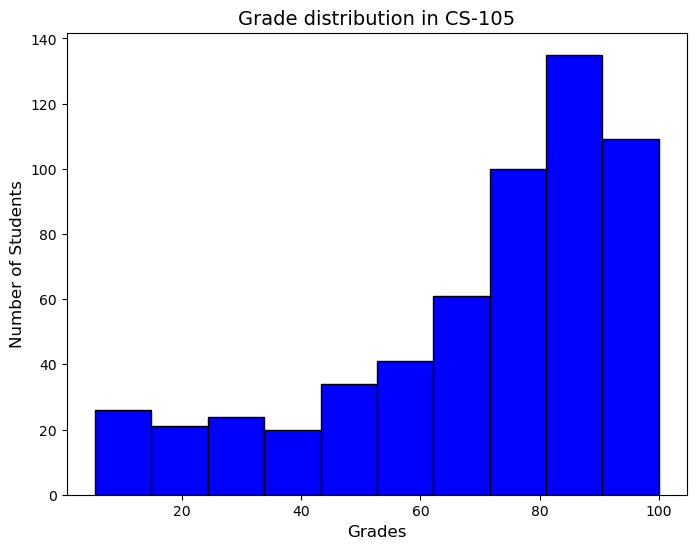

In [63]:
# get the grades for cs-105
cs_105_grades = student_grades_data['CS-105']
cs_105_grades.fillna(0)

# plot a histogram
plt.figure(figsize=(8,6))
plt.hist(cs_105_grades, bins=10, color='blue', edgecolor='black')
plt.title('Grade distribution in CS-105', fontsize=14)
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

plt.show()


Choose an appropriate visualization method, show how students are performing in the three courses CS-105, CS-106, and EE-109.

C:\Users\Jacob\AppData\Local\Temp\ipykernel_9800\2495481156.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([grades_data[course] for course in courses], labels=courses, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))


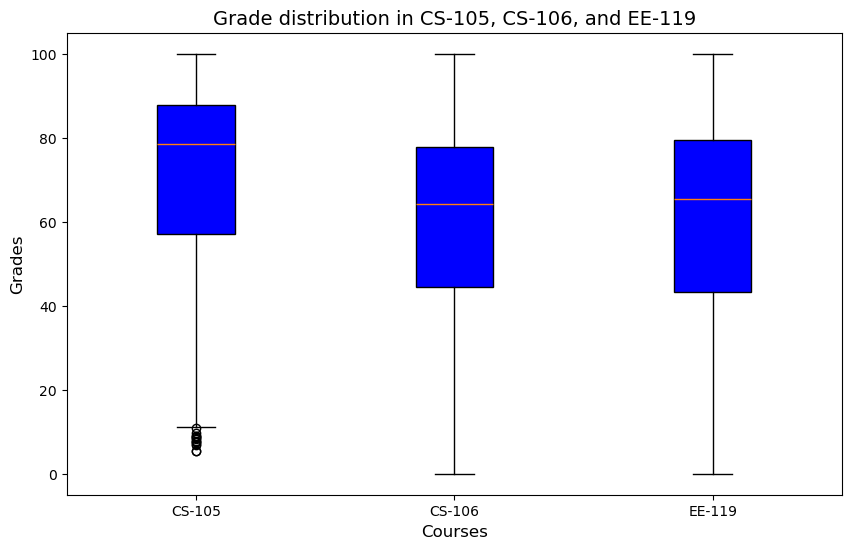

In [64]:
# select grades for each course
courses = ['CS-105', 'CS-106', 'EE-119']
grades_data = student_grades_data[courses]
grades_data.fillna(0)

# create a boxplot to show comparisons between courses
plt.figure(figsize=(10,6))
plt.boxplot([grades_data[course] for course in courses], labels=courses, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.title('Grade distribution in CS-105, CS-106, and EE-119', fontsize=14)
plt.ylabel('Grades', fontsize=12)
plt.xlabel('Courses', fontsize=12)

plt.show()

Choose an appropriate visualization method, show how students performance are related in CS-105 and CS-106.

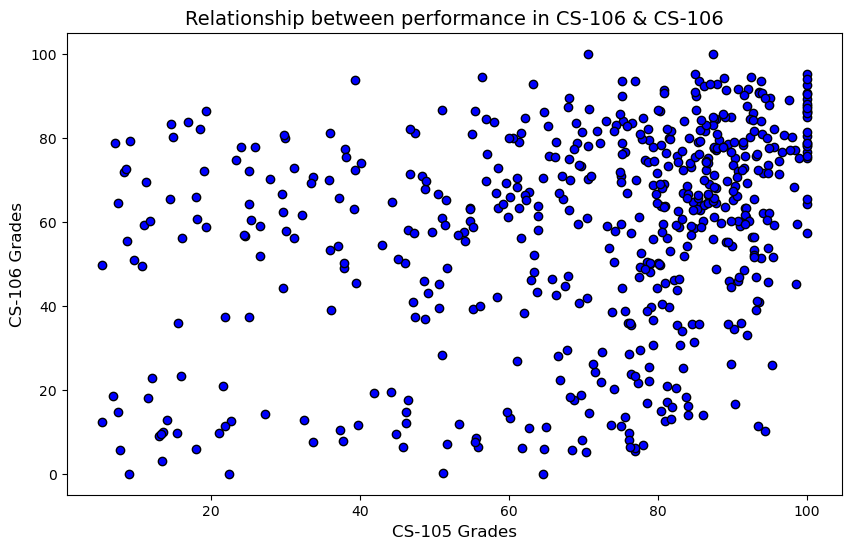

In [65]:
# select grades for cs0-105 (done above) and cs-106
cs_106_grades = student_grades_data['CS-106']
cs_106_grades.fillna(0)

# create a scatterplot (shows correlation)
plt.figure(figsize=(10,6))
plt.scatter(cs_105_grades, cs_106_grades, color='blue', edgecolor='black')
plt.title('Relationship between performance in CS-106 & CS-106', fontsize=14)
plt.xlabel('CS-105 Grades', fontsize=12)
plt.ylabel('CS-106 Grades', fontsize=12)

plt.show()

Since this data set contains purely numeric values, it is easy to work in numpy. Generate a numpy 2d array from the DataFrame. Notice that the first column is actually the student id. We are going to exclude it from our array.

In [66]:
grades_array = student_grades_data.iloc[:, 1:].to_numpy()

What is the data type of the elements in the array? Change the data type if appropriate.

In [67]:
print(grades_array.dtype) # float64
# change from float to an interger
grades_array = grades_array.astype(int)

print(grades_array.dtype)

float64
int64


What is the average grade for every course?

In [68]:
# get average grade for each course
avg_grades = np.mean(grades_array, axis=0)
for course, average in zip(student_grades_data.columns[1:], avg_grades):
    print(f"{course}: {average:.2f}")

PH-121: 60.70
HS-101: 48.47
CY-105: 68.17
HS-105/12: 56.81
MT-111: 59.45
CS-105: 69.50
CS-106: 57.98
EL-102: 59.05
EE-119: 59.71
ME-107: 51.05
CS-107: 58.24
HS-205/20: 67.11
MT-222: 51.17
EE-222: 63.32
MT-224: 55.90
CS-210: 62.55
CS-211: 50.36
CS-203: 54.72
CS-214: 48.37
EE-217: 63.12
CS-212: 52.97
CS-215: 51.23
MT-331: 61.02
EF-303: 44.54
HS-304: 53.14
CS-301: 55.57
CS-302: 61.21
TC-383: 55.94
MT-442: 66.51
EL-332: 56.22
CS-318: 49.64
CS-306: 56.84
CS-312: 58.25
CS-317: 49.61
CS-403: 61.77
CS-421: 44.17
CS-406: 57.37
CS-414: 70.86
CS-419: 58.53
CS-423: 57.21
CS-412: 57.52


Suppose that the grade point average (GPA) is calculated as a weighted average of all courses taken over the four years (in a scale of 100), and the weights are represented in an array. Define a method that calculate the GPA. Your method should work for multiple data entries:

In [69]:
grades_processed = grades_array

course_weights = np.array([1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4])
# define method to calculate gpa
def calc_gpa(grades, course_weights): 
    student_gpas = []
    
    for student_grades in grades_array:
        # calculate the weight for gpa
        weighted_grades = np.multiply(student_grades, course_weights)
        total_grades = np.sum(weighted_grades)
        total_weights = np.sum(course_weights)
        
        # calculate gpa and add to list
        gpa = total_grades / total_weights
        student_gpas.append(float(round(gpa, 2)))  # round to 2 decimal ppoints
    
    return student_gpas

In [70]:
print(calc_gpa(grades_processed, course_weights))

[38.9, 30.6, 77.57, 28.11, 70.66, 59.8, 57.63, 60.47, 69.1, 66.48, 49.02, 66.87, 51.28, 77.01, 74.21, 51.54, 65.57, 21.96, 74.59, 73.67, 36.86, 58.14, 57.3, 75.82, 73.49, 36.78, 69.88, 34.29, 64.37, 37.66, 72.0, 59.34, 64.64, 62.3, 64.12, 57.92, 61.12, 67.1, 35.98, 78.03, 59.93, 50.14, 53.68, 60.01, 0.79, 28.68, 30.52, 90.09, 84.98, 69.39, 38.24, 48.18, 63.12, 50.37, 58.86, 58.04, 69.77, 29.7, 61.45, 44.72, 3.53, 47.16, 44.84, 83.21, 57.48, 51.07, 56.58, 62.33, 46.11, 75.77, 71.14, 51.11, 71.42, 37.15, 65.15, 51.19, 70.44, 69.49, 65.85, 78.41, 56.77, 35.34, 81.64, 51.06, 56.89, 30.08, 8.08, 40.6, 53.36, 42.47, 34.19, 2.67, 29.39, 85.28, 24.94, 89.76, 89.31, 66.05, 91.67, 41.48, 84.37, 26.53, 64.28, 68.76, 84.03, 65.21, 27.58, 88.81, 64.74, 39.59, 82.99, 73.07, 32.29, 60.99, 28.45, 46.59, 55.81, 31.34, 68.88, 34.04, 45.94, 27.71, 64.37, 44.13, 77.82, 57.15, 45.35, 63.9, 59.39, 37.29, 47.61, 52.88, 40.22, 44.01, 43.31, 45.98, 24.18, 2.51, 26.69, 22.8, 69.72, 25.43, 5.43, 0.49, 87.79, 86.

To print your assignment, first select Cell -> Run All. Then choose File -> Download as -> HTML. You should submit both the Jupyter Notebook file and theprinted HTML file. 